<a href="https://colab.research.google.com/github/RyniekSzkola/175IC-machine-learning/blob/main/Zad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import sys

In [30]:
np.random.seed(42)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df.drop_duplicates()
for col in ['sex', 'smoker','region']:
  df[col] = df[col].astype('category');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


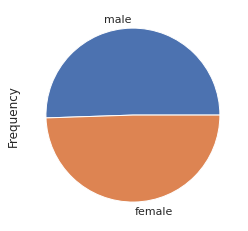

In [31]:
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

In [32]:
df_dummies = pd.get_dummies(df, drop_first=True)
print(df_dummies.head(7))
corr = df_dummies.corr()
print(corr)

   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0
5   31  25.740         0  ...                 0                 1                 0
6   46  33.440         1  ...                 0                 1                 0

[7 rows x 9 columns]
                       age       bmi  ...  region_southeast  region_southwest
age               1.000000  0.109272  ...         -0.011642          0.010016
bmi               0.109272  1.000000  ...          0.270025         -0.006205
children          0.042469  0.012759  ...         -0.023066          0.0

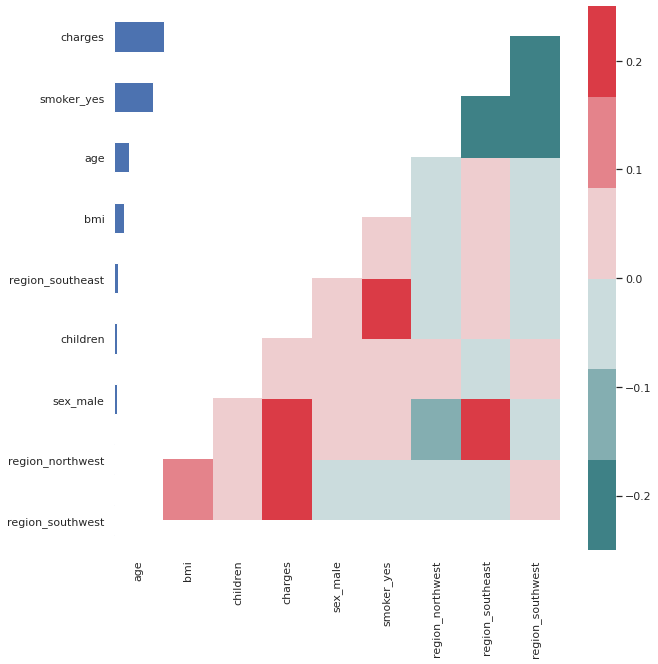

In [33]:
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.25, vmin=-0.25)
df_dummies.corr()['charges'].sort_values(ascending=True)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [34]:
output = df_dummies['charges']
input = df_dummies.drop(columns='charges')
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
print(x_train)
print(y_train)

      age     bmi  ...  region_southeast  region_southwest
560    46  19.950  ...                 0                 0
1285   47  24.320  ...                 0                 0
1142   52  24.860  ...                 1                 0
969    39  34.320  ...                 1                 0
486    54  21.470  ...                 0                 0
...   ...     ...  ...               ...               ...
1095   18  31.350  ...                 0                 0
1130   39  23.870  ...                 1                 0
1294   58  25.175  ...                 0                 0
860    37  47.600  ...                 0                 1
1126   55  29.900  ...                 0                 1

[1070 rows x 8 columns]
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


In [35]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_result=regressor.score(x_test,y_test)
print(f'R2 result: {r2_result:.4f}')

R2 result: 0.7836


MAE wynosi: 4181.19


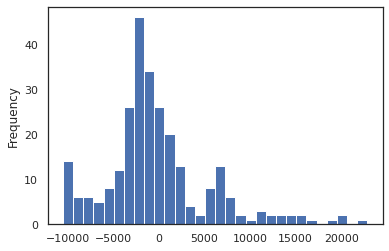

In [36]:
y_pred = regressor.predict(x_test)
y_pred[:10]
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.error.plot(kind='hist',bins=30)

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

In [37]:
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train,exog=x_train_ols).fit()
predictors = ['const'] + list(x_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          1.32e-305
Time:                        22:52:23   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.193e+04   1114.505  

In [38]:
df_dummies_2 = df_dummies.drop(columns=['sex_male', 'region_southeast', 'children','region_northwest','region_southwest'])

output = df_dummies_2['charges']
input = df_dummies_2.drop(columns='charges')
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

r2_result_2= regressor.score(x_test,y_test)
print(f'R2 2 result : {r2_result_2:.4f}')

y_pred = regressor.predict(x_test)
y_true = y_test.copy()

mae2 = mean_absolute_error(y_true, y_pred)
print(f'MAE-2 : {mae2:.2f}')

R2 2 result : 0.7379
MAE-2 : 3974.53
